In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
 
# instruction to the notebook stating warning should nit be displays
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
adfile = files.upload()

Saving diamonds.csv to diamonds.csv


In [3]:
df= pd.read_csv('diamonds.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  volume   53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [26]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#EDA  AND VISUALIZATIONS

In [5]:
del df['Unnamed: 0']

In [34]:
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [7]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df['depth'].unique()

In [11]:
df['price'].unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756])

In [ ]:
df['x'].unique()

In [ ]:
df['z'].unique()

In [ ]:
df['y'].unique()

# lets combine x,y,z column into volume column

In [24]:
df['volume']=df['x']*df['y']*df['z']
df['volume'].head()

0    38.202030
1    34.505856
2    38.076885
3    46.724580
4    51.917250
Name: volume, dtype: float64

In [27]:
df.drop(['x','y','z'],axis=1, inplace=True)

In [43]:
df= df[df['volume']<1000]

In [44]:
df['volume'].unique()

array([ 38.20203 ,  34.505856,  38.076885, ..., 114.126912, 118.110175,
       140.76612 ])

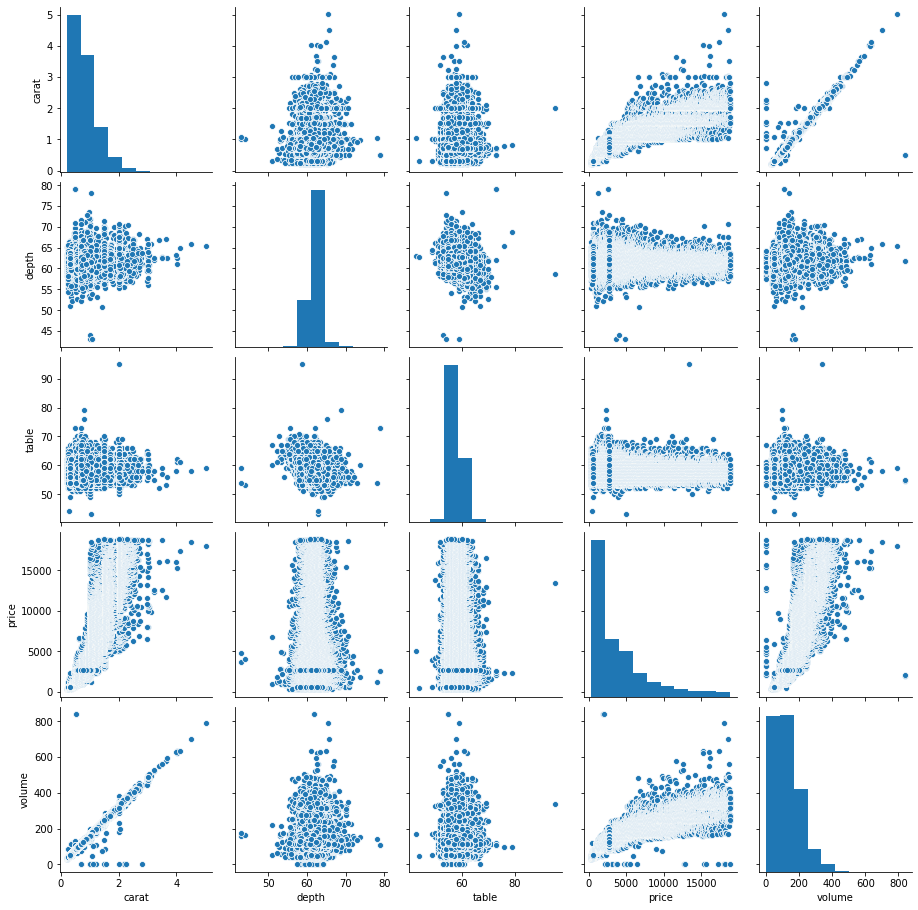

In [45]:
sns.pairplot(df)

Text(0.5, 1.0, 'distribution of diamond volume')

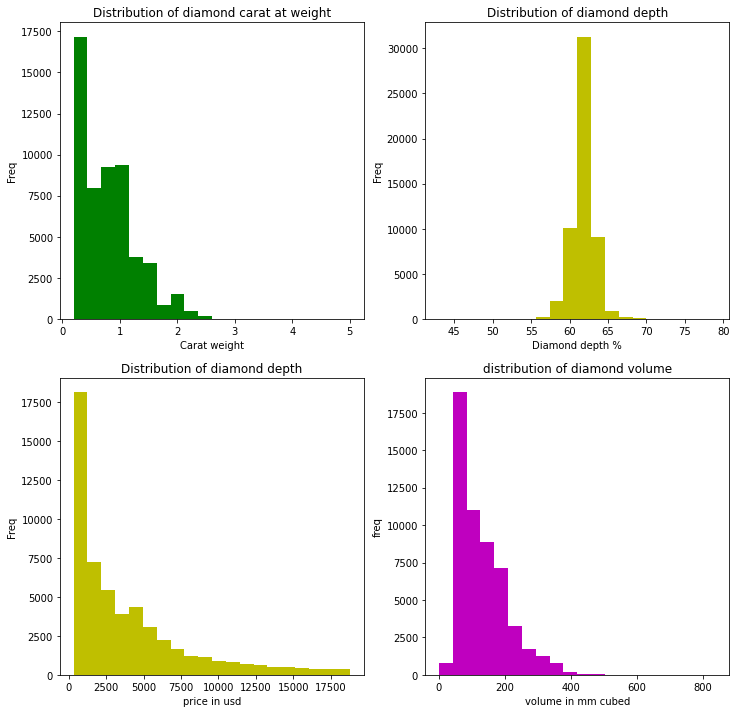

In [46]:
# carat
plt.figure(figsize=[12,12])
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='g')
plt.xlabel('Carat weight')
plt.ylabel('Freq')
plt.title('Distribution of diamond carat at weight')

#dept distribution
plt.subplot(222)
plt.hist(df['depth'],bins=20, color='y')
plt.xlabel('Diamond depth %')
plt.ylabel('Freq')
plt.title('Distribution of diamond depth')

# price
plt.subplot(223)
plt.hist(df['price'],bins=20, color='y')
plt.xlabel('price in usd')
plt.ylabel('Freq')
plt.title('Distribution of diamond depth')

# volume

plt.subplot(224)
plt.hist(df['volume'],bins=20,color='m')
plt.xlabel('volume in mm cubed')
plt.ylabel('freq')
plt.title('distribution of diamond volume')



# From above hist plot
#1 depth percentage is around 60% for most diamonds
#2 volume and carat weight are almost overlapped equally

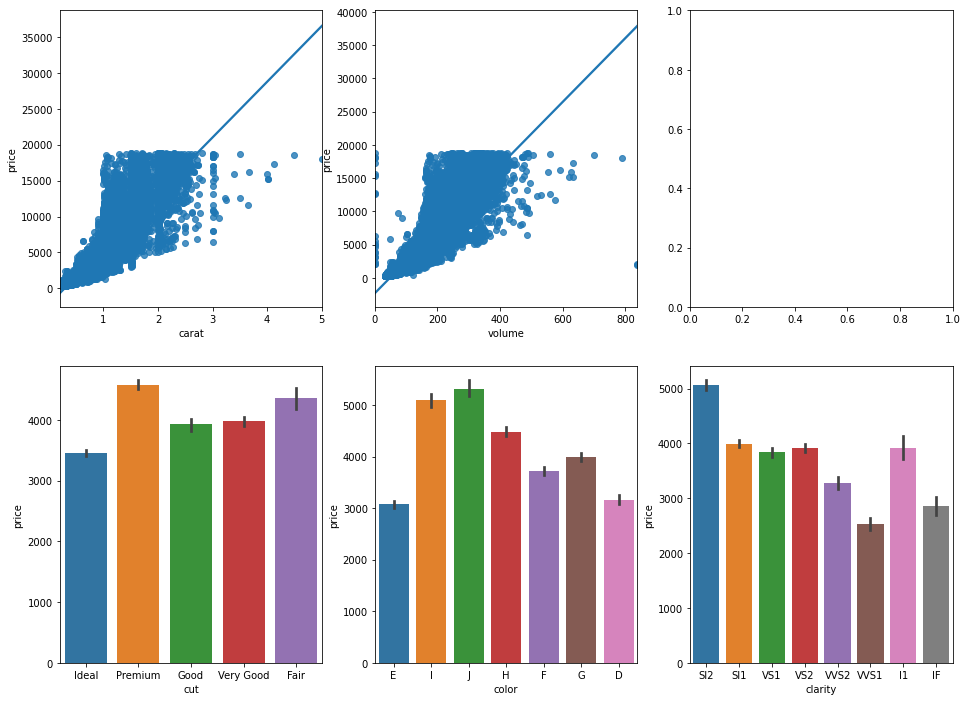

In [53]:
fig, axis= plt.subplots(2,3,figsize=(16,12))

sns.regplot(x='carat',y='price',data=df, ax=axis[0,0])
sns.regplot(x='volume',y='price',data=df, ax=axis[0,1])

# order plot from worst to best
sns.barplot(x='cut',y='price', order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],data=df,ax=axis[1,0])
sns.barplot(x='color',y='price', order=['E', 'I', 'J', 'H', 'F', 'G', 'D'],data=df,ax=axis[1,1])
sns.barplot(x='clarity',y='price', order=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],data=df,ax=axis[1,2])

# From abover plots 
#1 price increses as carat weight increses, and volume also
#2 quality of cut, color, clarity of diamond increse the price does not increse

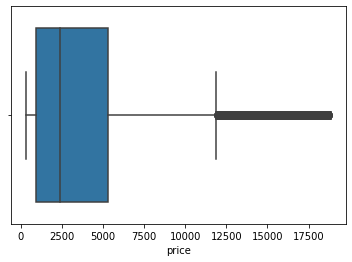

In [47]:
#removing outliers always depend on target
sns.boxplot(data=df,x="price")
plt.show()

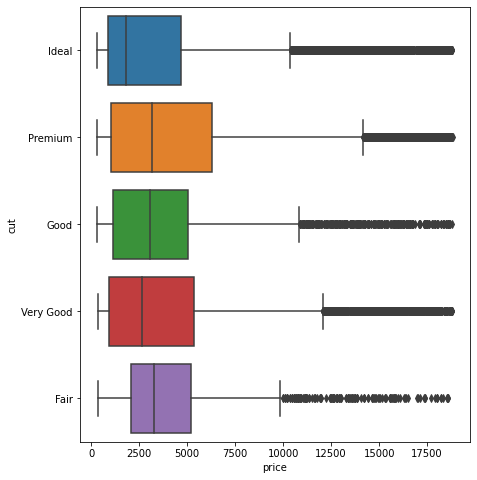

In [21]:
 plt.figure(figsize=(7,8))
sns.boxplot(data=df,x="price",y="cut")
plt.show()

In [55]:
# differnciate catogrial , num data
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64","int64"])

In [56]:
df_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [57]:
df_num.head()

,carat,depth,table,price,volume
0,0.23,61.5,55.0,326,38.202030
1,0.21,59.8,61.0,326,34.505856
2,0.23,56.9,65.0,327,38.076885
3,0.29,62.4,58.0,334,46.724580
4,0.31,63.3,58.0,335,51.917250


In [58]:
# for skew  import library
from scipy.stats import skew

carat : 1.1166428928865069


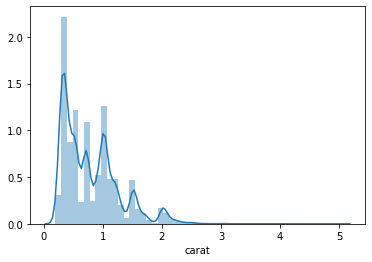

-------------------------------------
depth : -0.08226476896116393


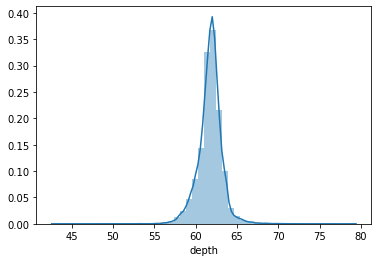

-------------------------------------
table : 0.7968560079678659


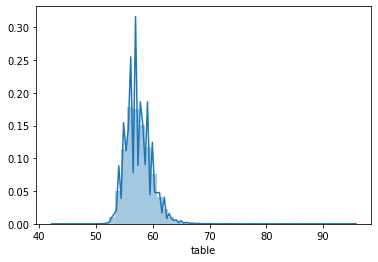

-------------------------------------
price : 1.618478829519948


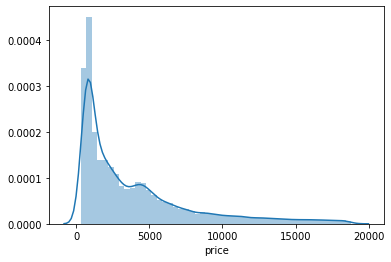

-------------------------------------
volume : 1.1338774216916856


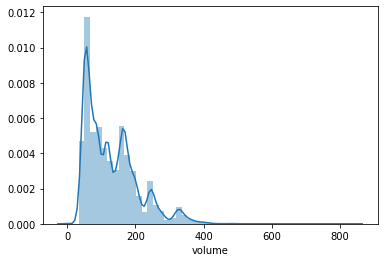

-------------------------------------


In [61]:
for col in df_num:
  print(col,":",skew(df_num[col]))
  sns.distplot(df_num[col])
  plt.show()
  print("-------------------------------------")

In [ ]:
#### carat,depth, table , volume
# carat and volume both have high corr with target
# depth contain negative

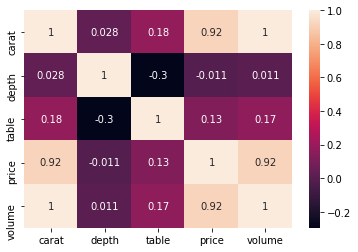

In [60]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

-0.3271531737479758


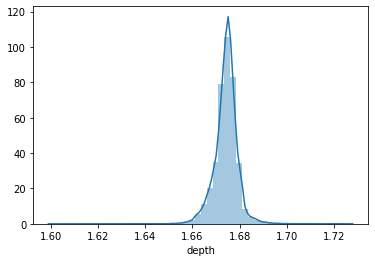

In [64]:
df_num['depth'] = np.sqrt(df_num['depth'])
print(skew(df_num['depth']))
sns.distplot(df_num['depth'])
plt.show()

0.6921917281266761


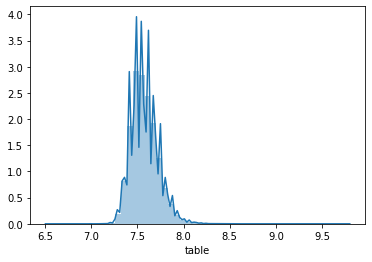

In [65]:
df_num['table'] = np.sqrt(df_num['table'])
print(skew(df_num['table']))
sns.distplot(df_num['table'])
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3


In [68]:
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

,carat,depth,table,price,volume,cut,color,clarity
0,0.23,1.673437,7.416198,326,38.202030,2,1,3
1,0.21,1.667584,7.810250,326,34.505856,3,1,2
2,0.23,1.657254,8.062258,327,38.076885,1,1,4
3,0.29,1.676479,7.615773,334,46.724580,3,5,5
4,0.31,1.679482,7.615773,335,51.917250,1,6,3


In [69]:
df_mm = df_new.copy()

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
for col in df_mm:
    mm = MinMaxScaler()
    df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,carat,depth,table,price,volume,cut,color,clarity
0,0.006237,0.579081,0.269258,0.000000,0.045560,0.50,0.166667,0.428571
1,0.002079,0.532777,0.392810,0.000000,0.041152,0.75,0.166667,0.285714
2,0.006237,0.451061,0.471825,0.000054,0.045411,0.25,0.166667,0.571429
3,0.018711,0.603143,0.331833,0.000433,0.055724,0.75,0.833333,0.714286
4,0.022869,0.626904,0.331833,0.000487,0.061917,0.25,1.000000,0.428571


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

MSE = 1853784.8397452827
R2=0.8791494956878676


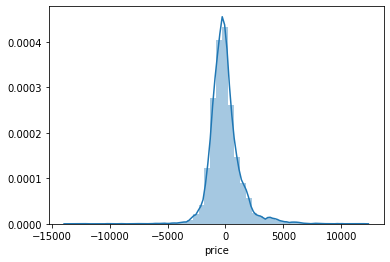

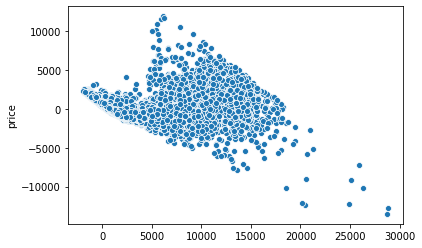

In [78]:
x = df_new.drop('price',axis=1)
y = df_new['price']
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lr= LinearRegression()
lr.fit(x_train,y_train)
y_hat = lr.predict(x_test)
print("MSE = {}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test, y_hat)))
residuals = y_test - y_hat
sns.distplot(residuals)
plt.show()
sns.scatterplot(y_hat,residuals)
plt.show()

MSE = 0.005418221222898735
R2=0.8791494956878638


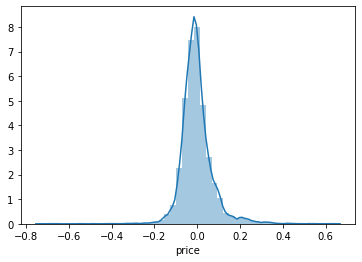

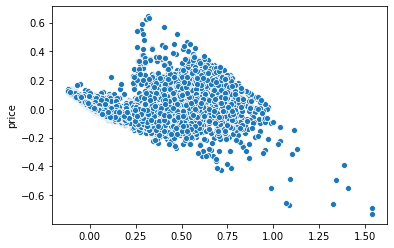

In [75]:
x = df_mm.drop('price',axis=1)
y = df_mm['price']
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lr= LinearRegression()
lr.fit(x_train,y_train)
y_hat = lr.predict(x_test)
print("MSE = {}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test, y_hat)))
residuals = y_test - y_hat
sns.distplot(residuals)
plt.show()
sns.scatterplot(y_hat,residuals)
plt.show()

In [82]:
df_mm['diamond score']= df_mm['cut']+df_mm['color']+df_mm['clarity']

In [84]:
df_mm.drop(['cut','color','clarity'],axis=1,inplace=True)

In [85]:
df_mm.head()

,carat,depth,table,price,volume,diamond score
0,0.006237,0.579081,0.269258,0.000000,0.045560,1.095238
1,0.002079,0.532777,0.392810,0.000000,0.041152,1.202381
2,0.006237,0.451061,0.471825,0.000054,0.045411,0.988095
3,0.018711,0.603143,0.331833,0.000433,0.055724,2.297619
4,0.022869,0.626904,0.331833,0.000487,0.061917,1.678571


MSE = 0.006589191709380512
R2=0.8530316300629085


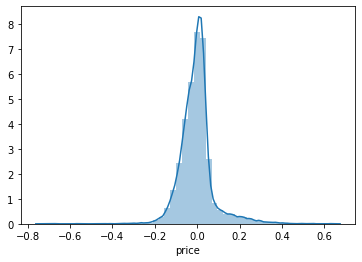

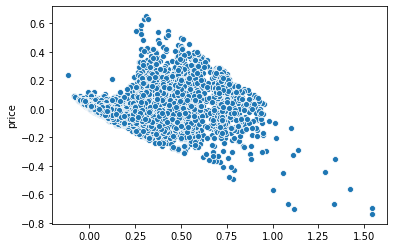

In [86]:
x = df_mm.drop('price',axis=1)
y = df_mm['price']
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lr= LinearRegression()
lr.fit(x_train,y_train)
y_hat = lr.predict(x_test)
print("MSE = {}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test, y_hat)))
residuals = y_test - y_hat
sns.distplot(residuals)
plt.show()
sns.scatterplot(y_hat,residuals)
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53939 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53939 non-null  object 
 2   color    53939 non-null  object 
 3   clarity  53939 non-null  object 
 4   depth    53939 non-null  float64
 5   table    53939 non-null  float64
 6   price    53939 non-null  int64  
 7   volume   53939 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.2+ MB


In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
